In [49]:
import numpy as np
import sklearn.datasets as sk
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle

In [11]:
D = pickle.load(open("../Laboratorios/L2/LAB2distancias002.p", 'rb'))

print(D.keys())

X = D['X']
y = D['idxClass']

print(X.shape)
print(np.unique(y))

dict_keys(['X', 'idxClass'])
(2, 3000)
[1. 2. 3.]


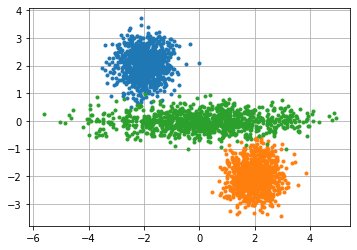

In [13]:
plt.plot(X[0, y == 1], X[1, y== 1], '.')
plt.plot(X[0, y == 2], X[1, y== 2], '.')
plt.plot(X[0, y == 3], X[1, y== 3], '.')
plt.axis('scaled')
plt.grid(True)
plt.show()

In [14]:
m1 = np.array([-2, 2])
m2 = np.array([2, -2])
m3 = np.zeros(2)

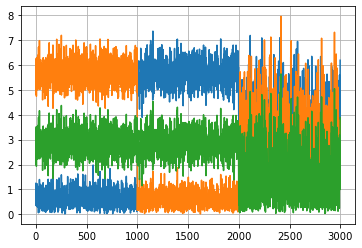

In [20]:
D1 = np.sqrt(np.sum((X-m1[:, np.newaxis]) ** 2, axis=0))
D2 = np.sqrt(np.sum((X-m2[:, np.newaxis]) ** 2, axis=0))
D3 = np.sqrt(np.sum((X-m3[:, np.newaxis]) ** 2, axis=0))

plt.plot(D1)
plt.plot(D2)
plt.plot(D3)
plt.grid(True)
plt.show()

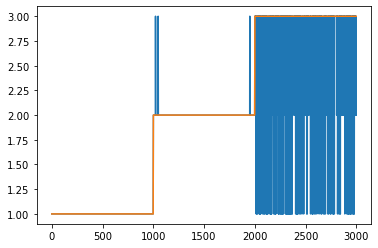

148

In [35]:
D = np.vstack((D1, D2, D3))
D.shape

ye = np.argmin(D, axis=0) + 1
np.unique(ye)

plt.plot(ye)
plt.plot(y)
plt.show()

np.sum(y == ye) / y.shape[0]
np.sum(ye[y==1] == 1)
np.sum(ye[y==2] == 2)
np.sum(ye[y==3] == 3)
np.sum(ye[y==3] == 1)
np.sum(ye[y==3] == 2)

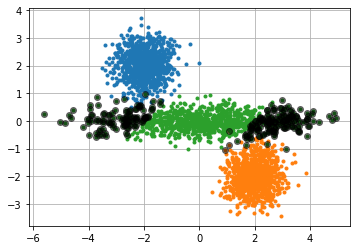

111

In [46]:
confusion_matrix(y, ye)

plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y==2], X[1, y==2], '.')
plt.plot(X[0, y==3], X[1, y==3], '.')

plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.5)
plt.axis('scaled')
plt.grid(True)
plt.show()

idx = ye[y==3]==1
idx = (ye==1)&(y==3)
np.sum(idx)

## Distância de Mahalanobis

In [59]:
S1 = np.diag(np.ones(2) / 4)
S1i = la.inv(S1)

S2 = np.diag(np.ones(2) / 4)
S2i = la.inv(S2)

S3 = np.diag(np.array([3, 1/10]))
S3i = la.inv(S3)

### O que é o diag?
Quando o argumento é uma matriz, devolve um array.
Quando o argumento é um array, devolve uma matriz.

In [64]:
import numpy.random as rd

A = rd.randint(-5, 6, (4, 4))

a = np.diag(A)
np.diag(a)

array([[-1,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

### Fim da Explicação

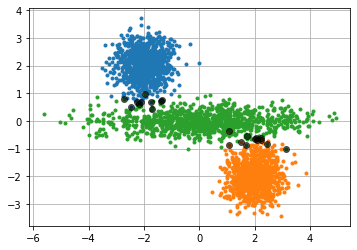

In [79]:
Xn1 = X - m1[:, np.newaxis]
D1 = np.sqrt(np.sum(Xn1*np.dot(S1i, Xn1), axis=0))

Xn2 = X - m2[:, np.newaxis]
D2 = np.sqrt(np.sum(Xn2*np.dot(S2i, Xn2), axis=0))

Xn3 = X - m3[:, np.newaxis]
D3 = np.sqrt(np.sum(Xn3*np.dot(S3i, Xn3), axis=0))

D = np.vstack((D1, D2, D3))
ye = np.argmin(D, axis=0)+1
confusion_matrix(y, ye)

plt.plot(X[0, y==1], X[1, y==1], '.')
plt.plot(X[0, y==2], X[1, y==2], '.')
plt.plot(X[0, y==3], X[1, y==3], '.')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.6)
plt.axis('scaled')
plt.grid(True)
plt.show()

#### -------------------

In [82]:
D = pickle.load(open("../Laboratorios/L2/MNISTsmall.p", 'rb'))
X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

In [87]:
X1 = X[:, f1]
y1 = y[f1]
X2 = X[:, f2]
y2 = y[f2]

In [137]:
#Converter para float.
X1 = X1 * 1.0
X2 = X2 * 1.0

#plt.imshow(X1[:, 0].reshape(28, 28), cmap='binary') #Cada imagem vai ter 784 pixeis, o que é uma imagem de 28x28.

In [141]:
m0 = np.mean(X1[:, y1==0], axis=1) #Média dos 0's.

#plt.imshow(m0.reshape(28, 28), cmap='binary') #Representação visual da imagem

In [146]:
S0 = np.cov(X1[:, y1==0])
S0.shape

(784, 784)

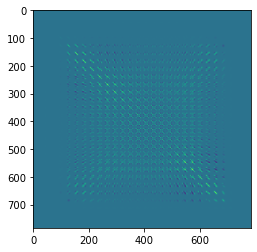

In [145]:
plt.imshow(S0)
plt.show()

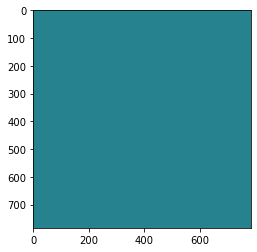

In [159]:
la.det(S0)

S0i = la.pinv(S0)
A = np.dot(S0i, S0i)

plt.imshow(A)
plt.show()

In [163]:
(784**2 - 784)/2+784*2 # Estimativa para cada classe
((784**2 - 784)/2+784*2) * 10 #Para todas as classes

3085040.0

In [150]:
S4 = np.cov(X1[:, y1==4])
S4.shape

(784, 784)

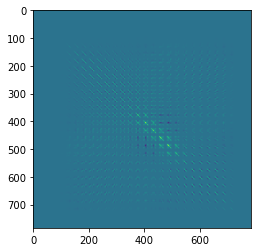

In [149]:
plt.imshow(S4)
plt.show()

In [151]:
S1 = np.cov(X1[:, y1==1])
S1.shape

(784, 784)

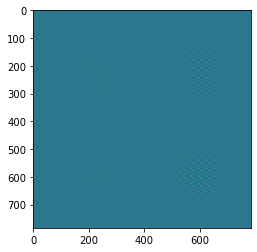

In [152]:
plt.imshow(S1)
plt.show()

In [143]:
m1 = np.mean(X1[:, y1==1], axis=1) #Média dos 1's.
m2 = np.mean(X1[:, y1==2], axis=1) #Média dos 2's.
m3 = np.mean(X1[:, y1==3], axis=1) #Média dos 3's.
m4 = np.mean(X1[:, y1==4], axis=1) #Média dos 4's.
m5 = np.mean(X1[:, y1==5], axis=1) #Média dos 5's.
m6 = np.mean(X1[:, y1==6], axis=1) #Média dos 6's.
m7 = np.mean(X1[:, y1==7], axis=1) #Média dos 7's.
m8 = np.mean(X1[:, y1==8], axis=1) #Média dos 8's.
m9 = np.mean(X1[:, y1==9], axis=1) #Média dos 9's.

#### ---------------------------

## Vizinhos Mais Próximos

In [167]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

In [170]:
knn.fit(X1.T, y1)
y2e = knn.predict(X2.T)

In [176]:
print(confusion_matrix(y2, y2e))
print(np.sum(y2==y2e)/y2.shape[0])

[[494   0   0   0   0   2   4   0   0   0]
 [  0 495   2   2   0   0   1   0   0   0]
 [  9  27 427   4   2   0   6  22   3   0]
 [  0   4   4 461   1  10   2   8   6   4]
 [  0   4   0   0 458   0   5   0   1  32]
 [  2   5   0  12   6 459   5   2   2   7]
 [  8   5   0   0   4   3 480   0   0   0]
 [  0  36   1   1   4   0   0 442   0  16]
 [ 11   5   7  23   4  13   6   9 413   9]
 [  4   8   3   8   8   1   1   8   2 457]]
0.9172


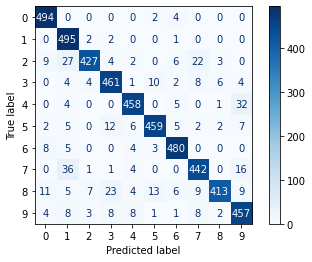

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay
ax = ConfusionMatrixDisplay(confusion_matrix(y2, y2e))
ax.plot(cmap='Blues')